In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Core #
import json
import os
import re

# IO
import h5py

# Science And Plotting #
import matplotlib
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import optimize

# Analysis #
import arpes
import arpes.config
from arpes.models.spectrum import DLD_Spectrum_factory, load_DLD
from arpes.models.view import View

# Jupyter #
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# Configure Jupyter #
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
from arpes.models.view import View

metadata = None
with open(os.path.join(arpes.config.SOURCE_PATH, 'datasets/ToF_debug/DLD_9_18.json')) as metadata_file:
    metadata = json.load(metadata_file)

spectra = {}
for spectrum_metadata in metadata:
    spectra[spectrum_metadata['unique_name']] = load_DLD(metadata=spectrum_metadata)


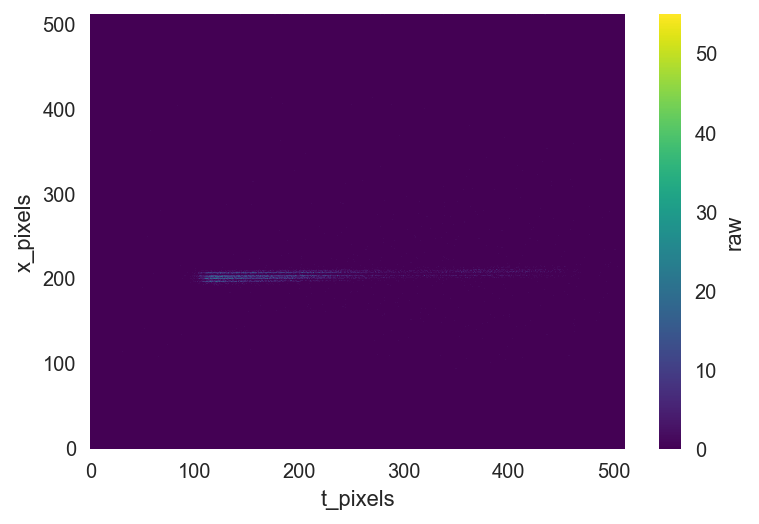

In [5]:
spectra['t_at_55'].raw.plot()

In [7]:
from arpes.preparation import process_DLD
for k, v in spectra.items():
    spectra[k] = process_DLD(v)

# Measurement of the spectrometer resolution for each of the straight section and spin section

## Straight section

We integrated a map over the polar angle and fit a step function to the resulting edge. We determined that the instrumental broadening of the straight section is around 18 meV.

## Spin arm

Using the DLD we determined that the resolution of the spin arm of the spectrometer is 17.5 meV.

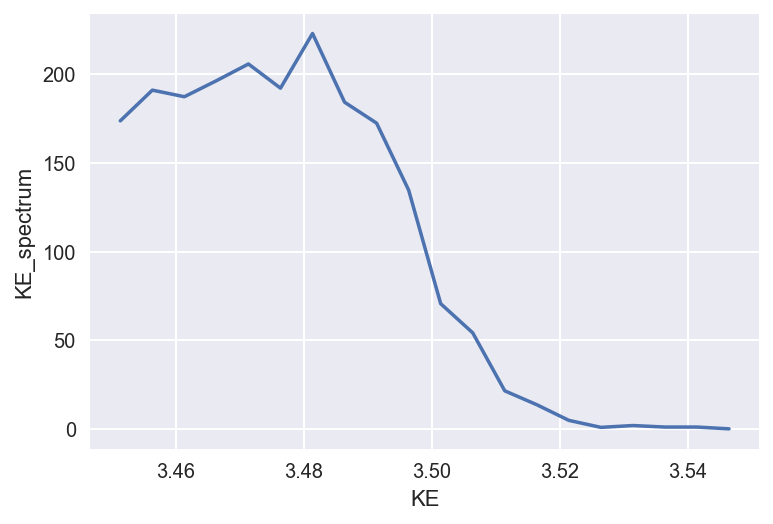

In [8]:
sum_spectra = None

for k, v in spectra.items():
    if sum_spectra is None:
        sum_spectra = v.KE_spectrum.sum('x_pixels')
    else:
        sum_spectra = sum_spectra + v.KE_spectrum.sum('x_pixels')

sum_spectra.sel(KE=slice(3.45, 3.55)).plot()

In [17]:
from arpes.fits import GStepBModel

fit_result = GStepBModel().guess_fit(
    sum_spectra.sel(KE=slice(3.45, 3.55)), center=3.5)

(<matplotlib.figure.Figure at 0x11c06b0f0>,
 <matplotlib.gridspec.GridSpec at 0x11c526ac8>)

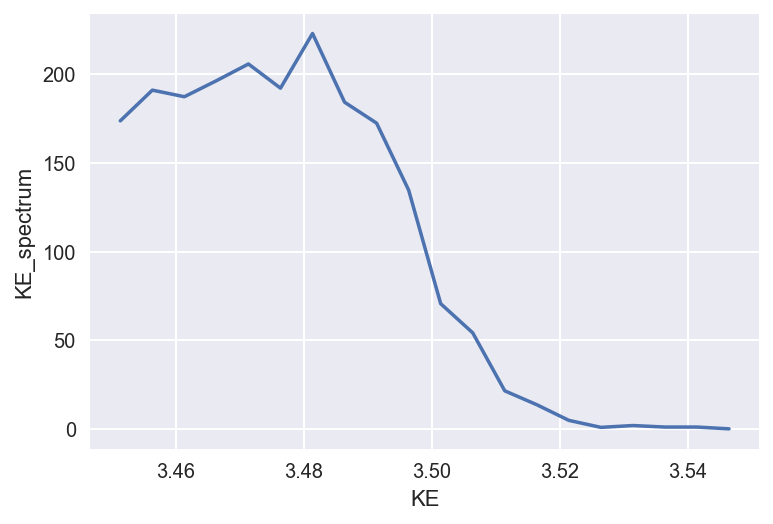

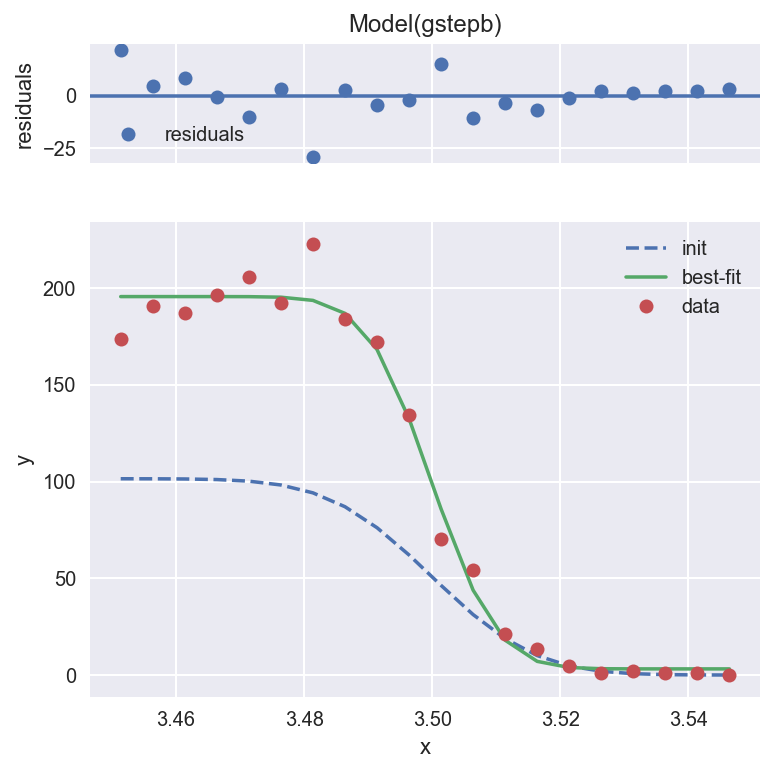

In [18]:
sum_spectra.sel(KE=slice(3.45,3.55)).plot()
fit_result.plot()

In [20]:
print(fit_result.fit_report())

[[Model]]
    Model(gstepb)
[[Fit Statistics]]
    # function evals   = 57
    # data points      = 20
    # variables        = 5
    chi-square         = 1993.787
    reduced chi-square = 132.919
    Akaike info crit   = 102.041
    Bayesian info crit = 107.020
[[Variables]]
    lin_bkg:     1.3564e+05 +/- nan      (nan%) (init= 0)
    const_bkg:   6595.46274 +/- nan      (nan%) (init= 0)
    width:       0.01887563 +/- 0.002694 (14.28%) (init= 0.03)
    erf_amp:     192.453482 +/- 6.456207 (3.35%) (init= 101.4742)
    center:      3.49996490 +/- 0.000844 (0.02%) (init= 3.5)
[[Correlations]] (unreported correlations are <  0.100)
    C(width, erf_amp)            =  0.470 



In [31]:
np.sqrt((fit_result.params['width'].value * 1000) ** 2 - 7 ** 2)

17.529675817869453

# Measurement of the spectrometer resolution for each of the straight section and spin section

## Straight section

We integrated a map over the polar angle and fit a step function to the resulting edge. We determined that the instrumental broadening of the straight section is around 18 meV.

## Spin arm

Using the DLD we determined that the resolution of the spin arm of the spectrometer is 17.5 meV.